In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


In [3]:
df.shape

(10055, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       10055 non-null  float64
 1   sexism       10055 non-null  float64
 2   other        10055 non-null  float64
 3   none         10055 non-null  float64
 4   label        10055 non-null  float64
 5   tweet        10055 non-null  object 
 6   category     10055 non-null  object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 864.2+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

0

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


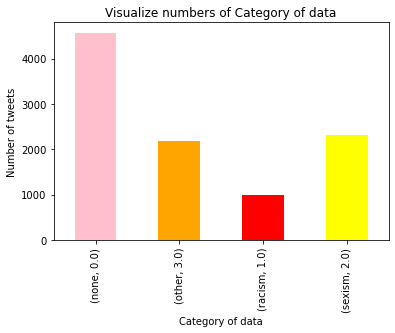

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

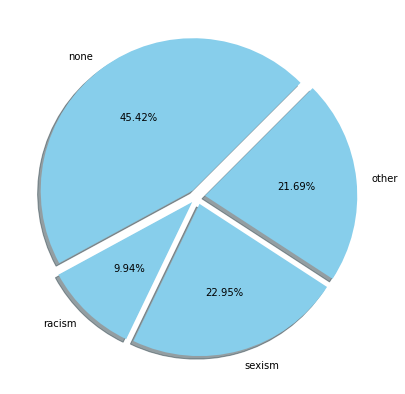

In [13]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.2f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [35]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1600, height = 800).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


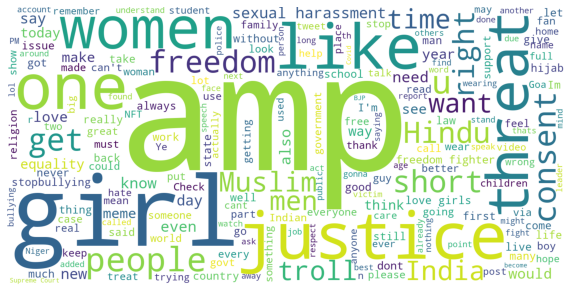

In [36]:
wordcloud_draw(none, 'none')

racism related tweets : 


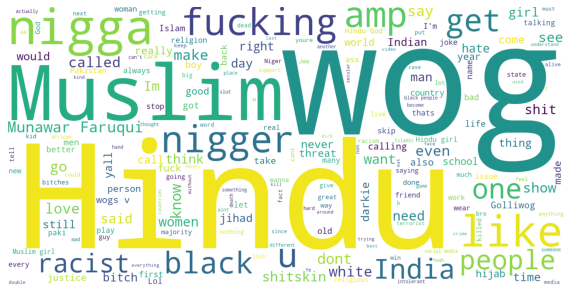

In [37]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


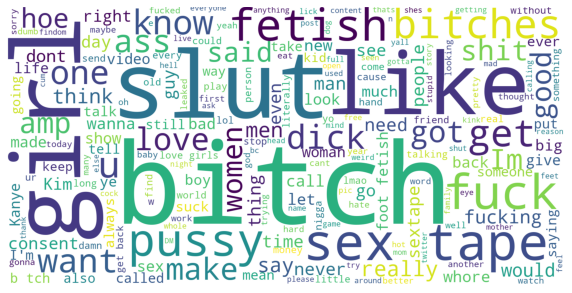

In [38]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


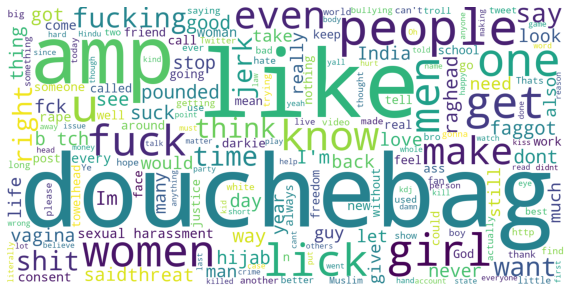

In [39]:
wordcloud_draw(other, 'other')

In [14]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

10055
10055


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features= 5000)
X = tfv.fit_transform(df.tweet).toarray()
y = np.array(df.category.values)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (10055, 5000)
y.shape =  (10055,)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

8044
2011


In [17]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_train

array(['sexism', 'none', 'none', ..., 'sexism', 'racism', 'other'],
      dtype=object)

In [20]:
y_test

array(['sexism', 'sexism', 'sexism', ..., 'none', 'sexism', 'none'],
      dtype=object)

In [21]:
#create list of model and accuracy dicts
perform_list = [ ]

In [22]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
        
    


    elif model_name == 'Support Vector Classifer':

        mdl = SVC()




    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [23]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 76.58 %
Precision : 0.765788165091994
Recall : 0.765788165091994
F1-score : 0.765788165091994
Time taken:  13.455413579940796


In [50]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 70.61 %
Precision : 0.7061163600198906
Recall : 0.7061163600198906
F1-score : 0.7061163600198906
Time taken:  0.6178834438323975


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [51]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 79.86 %
Precision : 0.7986076578816509
Recall : 0.7986076578816509
F1-score : 0.7986076578816508
Time taken:  163.24015021324158


In [53]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,76.68,0.77,0.77,0.77
1,Multinomial Naive Bayes,70.61,0.71,0.71,0.71
2,Random Forest,79.86,0.80,0.80,0.80


In [54]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 79.86 %


In [24]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [56]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(tfv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [25]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : nigga
1506487023728828419 2022-03-23 09:54:30 +0530 <LegendOfWinning> This nigga Shawn Marion is drunk rambling rn
1506487021140955136 2022-03-23 09:54:29 +0530 <Sosa1804> Shit nigga jumping like that why tf he ain’t playing lol
1506487020566290433 2022-03-23 09:54:29 +0530 <igoby_meezy> Nigga look like he almost hurt himself
1506487015633825792 2022-03-23 09:54:28 +0530 <Slo_Motion> This nigga drunk.
1506487010281861120 2022-03-23 09:54:27 +0530 <SlimeBallUchiha> @borushiki21 Talk to these niggas!!!
1506487009937870849 2022-03-23 09:54:27 +0530 <ronnyrxck> @saucelessshaun Nigga name is Brian lmao
1506486993940893698 2022-03-23 09:54:23 +0530 <fourthworldp> ik rich nigga timeline like the back of my hand 💀
1506486993856905217 2022-03-23 09:54:23 +0530 <imjadawilliams> hood niggas be the sweetest when they inlove with you
1506486991340425223 2022-03-23 09:54:22 +0530 <600Racks> Put the mask on Jim Carey A nigga
1506486989062868993 2022-03-23 09:54:22

In [26]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


1200


0       If you want a bad bitch then go get one..oh I ...
1       It’s a real one Birthdayyyy! My nigga 4 lyfe @...
2       Aye I love to see it ! And when he dubbed back...
3       ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY N...
4       Nîggas really saying Tony Parker better than T...
                              ...                        
1195    rest in peace flippa. that nigga was so mf bumpin
1196    Druski was never funny to begin with. Corny la...
1197    @90serajo @_brwnsugaK Yeah those hard but I me...
1198                        @jusvamp tyyyyy gangggg &lt;3
1199        So glad I washed my hands of this p*ssy nigga
Name: tweet, Length: 1200, dtype: object

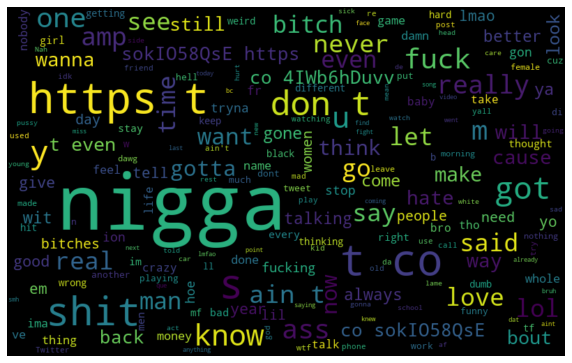

In [27]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [28]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en':
            pattern = "[^@[\w]+]| [a-zA-Z]+"
            result = ''.join(re.findall(pattern, input_txt))
            return result

    except Exception as e:
        print(e)

In [29]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

No features in text.
No features in text.
No features in text.
No features in text.


In [30]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0     you want a bad bitch then go get one I forgot...
1                 a real one Birthdayyyy My nigga lyfe
2     I love to see it And when he dubbed back and ...
3       BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA
4         really saying Tony Parker better than T Lmao
Name: tweet, dtype: object

Length before deleting:  1200
Length after deleting:  979
Empty values:  0


In [31]:
df1['tweet'].head()

0     you want a bad bitch then go get one I forgot...
1                 a real one Birthdayyyy My nigga lyfe
2     I love to see it And when he dubbed back and ...
3       BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA
4         really saying Tony Parker better than T Lmao
Name: tweet, dtype: object

In [32]:
lemmatizer = WordNetLemmatizer()

In [33]:
tweets = []
for i in df1['tweet']:
    tweets.append(i)
tweets

[' you want a bad bitch then go get one I forgot you niggas is bums that why you can get one',
 ' a real one Birthdayyyy My nigga lyfe',
 ' I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me',
 ' BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA',
 ' really saying Tony Parker better than T Lmao',
 ' How about when dude in orange starts to come to he says ok my nigga and knocks him out again',
 ' don even be the hoes running they mouth it be the niggas',
 ' don even be liking these niggas fr I just have attachment issues',
 ' TIED',
 ' will tweet about but won go the store for their kids who need go the dentist get they teeth fixed',
 ' niggas be like would you rather have student loans orrrr sign your life away to the U gov and be treated like absolute shit while you ruin the lives of citizens abroad choice bud LMFAOOOO',
 ' almost made a nigga cry https',
 ' gender is a great day to be a great day nigga what the fuck',
 ' was coo

In [34]:
corpus = []
for i in range(len(tweets)):
    tweet = re.sub('[^a-zA-Z]', ' ', tweets[i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    corpus.append(tweet)

for i in corpus:
    print(i)

want bad bitch go get one forgot nigga bum get one
real one birthdayyyy nigga lyfe
love see dubbed back ask nigga ok knocked em really sent
fuck otha nigga ill die fa nigga
really saying tony parker better lmao
dude orange start come say ok nigga knock
even hoe running mouth nigga
even liking nigga fr attachment issue
tied
tweet go store kid need go dentist get teeth fixed
nigga like would rather student loan orrrr sign life away u gov treated like absolute shit ruin life citizen abroad choice bud lmfaoooo
almost made nigga cry http
gender great day great day nigga fuck
cooking cooking huh
always nigga dent bumper falling want drive stupid shit probably insurance either
bettin completely double hated nigga please greet pound
shit sad nigga even attempt dribble good lord smh
see happy n pregnant w nigga know reached pinnacle peak happiness
nigga w drama man lol
lol way nigga asking question nowadays surely glad game forever ingathi ngumsebenzi lento ngoku
name anything tf ur name backnd

In [36]:
y_pred1 = tfv.transform(corpus)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   




[1]   you want a bad bitch then go get one I forgot you niggas is bums that why you can get one  [sexism]

[2]   a real one Birthdayyyy My nigga lyfe  [racism]

[3]   I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me  [racism]

[4]   BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA  [sexism]

[5]   really saying Tony Parker better than T Lmao  [none]

[6]   How about when dude in orange starts to come to he says ok my nigga and knocks him out again  [racism]

[7]   don even be the hoes running they mouth it be the niggas  [sexism]

[8]   don even be liking these niggas fr I just have attachment issues  [racism]

[9]   TIED  [none]

[10]   will tweet about but won go the store for their kids who need go the dentist get they teeth fixed  [none]

[11]   niggas be like would you rather have student loans orrrr sign your life away to the U gov and be treated like absolute shit while you ruin the lives of citizens abroad choice bud L

In [174]:
# import necessary libraries 
import easyocr
import joblib


In [38]:
def imgtotext(links):
    
    
    reader = easyocr.Reader(['en'], gpu = False)
    
    for link in links:
        
        result = reader.readtext(link, paragraph='False', detail  = 0)
    
    corpus = []
    
    for i in range(len(result)):
        tweet = re.sub('[^a-zA-Z]', ' ', result[i])
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
        tweet = " ".join(tweet)
        corpus.append(tweet)

    text  = " "
    text = text.join(corpus)
    
    
    vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
    model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
    loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
    loaded_model = joblib.load(model_filename) # load model

    text_transformed = loaded_vectorizer.transform([text])

    print(text)
    return loaded_model.predict(text_transformed)




    

In [176]:
for i in range(len(df1)):
    
    if len(df1['photos'][i]) > 2:
        text = df1['photos'][i]
        pattern = "https:[^']+"
        links = re.findall(pattern, text)

        print(imgtotext(links))

KeyboardInterrupt: 

In [ ]:
import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
loaded_model = joblib.load(model_filename) # load model


# for i in range(len(df1)):
#     hashtags = ""
#     if len(df1['hashtags'][i]) > 2:
#         text = df1['hashtags'][i]
#         pattern = "\w+"
#         hashtags = " ".join(re.findall(pattern, text))
#         print("\nTweet: ", df1['tweet'][i])
#         text_transformed = loaded_vectorizer.transform([hashtags])
#         print("\nHashtags: ", df1['hashtags'][i])
#         print("\nPrediction: ", loaded_model.predict(text_transformed))





for i in range(len(df1)):
    
    print("\nTweet: ", df1['tweet'][i])
    
    text_transformed =  loaded_vectorizer.transform([corpus[i]])
    text_result = loaded_model.predict(text_transformed)
    
    hashtags_result = ' '
    hashtags = ""
    
    if len(df1['hashtags'][i]) > 2:
        
        text = df1['hashtags'][i]
        pattern = "\w+"
        hashtags = " ".join(re.findall(pattern, text))
        
        print("\nHashtags: ", df1['hashtags'][i])
        
        hashtags_transformed = loaded_vectorizer.transform([hashtags])
        hashtags_result = loaded_model.predict(hashtags_transformed)
    
    else:
        print("\nHashtags: No hashtags!!")
                
    if ( text_result != 'none') :
       
        print("\nPrediction : ", text_result)
    
    elif (hashtags_result != 'none') :
        
        print("\nPrediction : ", hashtags_result)

    else:
        
        print("\nPrediction : None")

        
        


Tweet:   you want a bad bitch then go get one I forgot you niggas is bums that why you can get one

Hashtags: No hashtags!!

Prediction :  ['sexism']

Tweet:   a real one Birthdayyyy My nigga lyfe

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA

Hashtags: No hashtags!!

Prediction :  ['sexism']

Tweet:   really saying Tony Parker better than T Lmao

Hashtags: No hashtags!!

Prediction :   

Tweet:   How about when dude in orange starts to come to he says ok my nigga and knocks him out again

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   don even be the hoes running they mouth it be the niggas

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   don even be liking these niggas fr I just have attachment issues

Hashtags: No hashtags!!

Pr